In [63]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [39]:
% matplotlib inline

## In this part we will first show how to create vectors and matrices in numpy

In [40]:
# Create a all-zero vector.
z = np.zeros(5)
print(z)
print("Type of elements in z: {}".format(z.dtype))
# You can also specify the type of the created elements
z = np.zeros(5, dtype=np.float32)
print(z)
print("Type of elements in z: {}".format(z.dtype))

# Similarly, you can also create a all-one vector.
a = np.ones(10)
print(a)

# To see the size of an array, use the following attribute:
print("Size of the created array: {}".format(a.shape))
m = np.zeros((4, 5))
print("Size of the matrix: {}".format(m.shape))

[0. 0. 0. 0. 0.]
Type of elements in z: float64
[0. 0. 0. 0. 0.]
Type of elements in z: float32
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Size of the created array: (10,)
Size of the matrix: (4, 5)


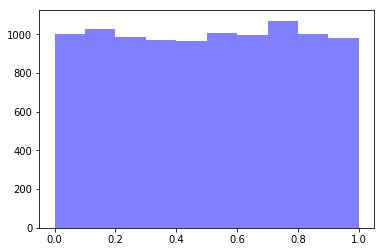

In [41]:
# Now what if I'd like to generate a sequence of random numbers in [0, 1]?
t = np.random.rand(10000)

# To verify the generated sequence of numbers indeed follow the uniform distribution, we visualize them using histogram:
num_bins = 10
n, bins, patches = plt.hist(t, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [42]:
# OK, we now know how to create vectors, let's multiply them!
dim = 10000
vec_a, vec_b = np.random.rand(dim), np.random.rand(dim)
r = np.dot(vec_a, vec_b)
print("Inner product of a and b: {}".format(r))

# Let's brute forcely verify that the answer is correct. 
r = 0.0
for a, b in zip(vec_a, vec_b):
    r += a * b
print("Verification value: {}".format(r))


Inner product of a and b: 2507.135479479752
Verification value: 2507.135479479749


In [46]:
# But, using np.dot() is much much faster!
dim = 100
matrix_a, matrix_b = np.random.rand(dim, dim), np.random.rand(dim, dim)

In [47]:
%%timeit 
np.dot(matrix_a, matrix_b)

20.9 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [48]:
%%timeit
r = np.zeros((dim, dim))
for i in range(dim):
    for j in range(dim):
        s = 0.0
        for k in range(dim):
            s += matrix_a[i, k] * matrix_b[k, j]

375 ms ± 5.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### As shown above, for matrices of very moderate size, the improvement using the internal implementation of Numpy is more than 10000

In [51]:
# Now we show some basic matrix operations that we learned from Lecture 1.
m = np.random.rand(4, 4)
m

array([[0.48870152, 0.17430632, 0.76289926, 0.39520835],
       [0.19403696, 0.77016551, 0.38486592, 0.05380492],
       [0.71784197, 0.14508135, 0.68484003, 0.83052676],
       [0.68938513, 0.67362698, 0.52797212, 0.10092024]])

In [52]:
# The transpose of a matrix.
m.T

array([[0.48870152, 0.19403696, 0.71784197, 0.68938513],
       [0.17430632, 0.77016551, 0.14508135, 0.67362698],
       [0.76289926, 0.38486592, 0.68484003, 0.52797212],
       [0.39520835, 0.05380492, 0.83052676, 0.10092024]])

In [53]:
# Matrix product.
a = np.random.rand(3, 4)
b = np.random.rand(4, 5)
np.dot(a, b)

array([[0.92059818, 0.59212644, 1.2338085 , 1.31981384, 0.53657524],
       [1.42398886, 0.80050031, 1.8931957 , 2.05750024, 0.59569989],
       [1.64479955, 1.1203698 , 2.16828353, 2.29779367, 1.04740108]])

In [54]:
# Trace of a square matrix:
np.trace(m)

2.044627307989003

In [59]:
# Rank of a matrix:
print(np.linalg.matrix_rank(m))
# See rank-deficient matrices
z = np.zeros((4, 4))
o = np.ones((4, 4))
print("Rank of all-zero matrix: {}".format(np.linalg.matrix_rank(z)))
print("Rank of all-one matrix: {}".format(np.linalg.matrix_rank(o)))

4
Rank of all-zero matrix: 0
Rank of all-one matrix: 1


In [60]:
# Compute the inverse of a matrix:
inv = np.linalg.inv(m)
np.allclose(np.dot(inv, m), np.eye(4))

True

In [65]:
# Compute the eigen-decomposition of a square matrix.
print("The original square matrix:")
print(m)
w, v = np.linalg.eig(m)
print("Eigenvalues: {}".format(w))
print("Eigenvectors: ")
print(v)

The original square matrix:
[[0.48870152 0.17430632 0.76289926 0.39520835]
 [0.19403696 0.77016551 0.38486592 0.05380492]
 [0.71784197 0.14508135 0.68484003 0.83052676]
 [0.68938513 0.67362698 0.52797212 0.10092024]]
Eigenvalues: [ 1.94919417+0.j         -0.22033058+0.22769634j -0.22033058-0.22769634j
  0.53609431+0.j        ]
Eigenvectors: 
[[ 0.50394142+0.j         -0.09633057+0.44944953j -0.09633057-0.44944953j
   0.38397582+0.j        ]
 [ 0.31442997+0.j          0.10914821+0.12129047j  0.10914821-0.12129047j
  -0.8211358 +0.j        ]
 [ 0.64127055+0.j         -0.39078878-0.4741779j  -0.39078878+0.4741779j
   0.34069174+0.j        ]
 [ 0.48574575+0.j          0.62010506+0.j          0.62010506-0.j
  -0.24945483+0.j        ]]


In [66]:
m = (m + m.T) / 2
print(m)
w, v = np.linalg.eig(m)
print("Eigenvalues: {}".format(w))
print("Eigenvectors: ")
print(v)

[[0.48870152 0.18417164 0.74037061 0.54229674]
 [0.18417164 0.77016551 0.26497363 0.36371595]
 [0.74037061 0.26497363 0.68484003 0.67924944]
 [0.54229674 0.36371595 0.67924944 0.10092024]]
Eigenvalues: [ 1.95659874  0.62684194 -0.15788785 -0.38092552]
Eigenvectors: 
[[-0.52667033 -0.29202623  0.77885783 -0.17526983]
 [-0.35968498  0.91717138  0.06493582 -0.15876621]
 [-0.6232551  -0.27064597 -0.61348479 -0.40241801]
 [-0.4525463  -0.01637343 -0.11313811  0.88438313]]
